In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
from datetime import date
import datetime as dt
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import and_, or_

In [36]:
sqlite_db = "./hawaii.sqlite"
engine = create_engine(f'sqlite:///{sqlite_db}')
insp = inspect(engine)

In [37]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [38]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
insp.get_table_names()

['measurement', 'station']

In [40]:
Base.classes.values()

[sqlalchemy.ext.automap.measurement, sqlalchemy.ext.automap.station]

In [41]:
insp.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [42]:
insp.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [43]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [45]:
results = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
for result in results:
    print(result)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)
(11, 'USC00519397', '2010-01-12', 0.0, 61.0)
(12, 'USC00519397', '2010-01-14', 0.0, 66.0)
(13, 'USC00519397', '2010-01-15', 0.0, 65.0)
(14, 'USC00519397', '2010-01-16', 0.0, 68.0)
(15, 'USC00519397', '2010-01-17', 0.0, 64.0)
(16, 'USC00519397', '2010-01-18', 0.0, 72.0)
(17, 'USC00519397', '2010-01-19', 0.0, 66.0)
(18, 'USC00519397', '2010-01-20', 0.0, 66.0)
(19, 'USC00519397', '2010-01-21', 0.0, 69.0)
(20, 'USC00519397', '2010-01-22', 0.0, 67.0)
(21, 'USC00519397', '2010-01-23', 0.0, 67.0)
(22, 'USC00519397', '2010-01-24', 0.01, 71.0)
(23, 'USC00519

(2595, 'USC00519397', '2017-04-11', 0.0, 79.0)
(2596, 'USC00519397', '2017-04-12', 0.0, 78.0)
(2597, 'USC00519397', '2017-04-13', 0.0, 77.0)
(2598, 'USC00519397', '2017-04-14', 0.26, 75.0)
(2599, 'USC00519397', '2017-04-15', 0.01, 73.0)
(2600, 'USC00519397', '2017-04-16', 0.0, 74.0)
(2601, 'USC00519397', '2017-04-17', 0.02, 74.0)
(2602, 'USC00519397', '2017-04-18', 0.0, 75.0)
(2603, 'USC00519397', '2017-04-19', 0.02, 74.0)
(2604, 'USC00519397', '2017-04-20', 0.05, 78.0)
(2605, 'USC00519397', '2017-04-21', 0.23, 73.0)
(2606, 'USC00519397', '2017-04-22', 0.32, 76.0)
(2607, 'USC00519397', '2017-04-23', 0.03, 77.0)
(2608, 'USC00519397', '2017-04-24', 0.0, 77.0)
(2609, 'USC00519397', '2017-04-25', 0.0, 77.0)
(2610, 'USC00519397', '2017-04-26', 0.0, 77.0)
(2611, 'USC00519397', '2017-04-27', 0.0, 78.0)
(2612, 'USC00519397', '2017-04-28', 0.0, 76.0)
(2613, 'USC00519397', '2017-04-29', 0.12, 72.0)
(2614, 'USC00519397', '2017-04-30', 0.89, 63.0)
(2615, 'USC00519397', '2017-05-01', 0.26, 75.0)
(2

(4224, 'USC00513117', '2014-03-05', 0.0, 66.0)
(4225, 'USC00513117', '2014-03-06', 0.0, 65.0)
(4226, 'USC00513117', '2014-03-07', 0.12, 74.0)
(4227, 'USC00513117', '2014-03-08', 0.94, 67.0)
(4228, 'USC00513117', '2014-03-09', 0.34, 72.0)
(4229, 'USC00513117', '2014-03-10', 0.05, 73.0)
(4230, 'USC00513117', '2014-03-11', 0.05, 72.0)
(4231, 'USC00513117', '2014-03-12', 0.0, 72.0)
(4232, 'USC00513117', '2014-03-13', 0.0, 73.0)
(4233, 'USC00513117', '2014-03-14', 0.08, 71.0)
(4234, 'USC00513117', '2014-03-15', 0.1, 70.0)
(4235, 'USC00513117', '2014-03-16', 0.01, 69.0)
(4236, 'USC00513117', '2014-03-17', 0.04, 68.0)
(4237, 'USC00513117', '2014-03-18', 0.0, 69.0)
(4238, 'USC00513117', '2014-03-19', 0.01, 71.0)
(4239, 'USC00513117', '2014-03-20', 0.0, 70.0)
(4240, 'USC00513117', '2014-03-21', 0.02, 72.0)
(4241, 'USC00513117', '2014-03-22', 0.0, 70.0)
(4242, 'USC00513117', '2014-03-23', 0.0, 72.0)
(4243, 'USC00513117', '2014-03-24', 0.0, 72.0)
(4244, 'USC00513117', '2014-03-25', 0.02, 71.0)
(4

(5976, 'USC00514830', '2011-11-16', 0.0, 72.0)
(5977, 'USC00514830', '2011-11-17', 0.0, 73.0)
(5978, 'USC00514830', '2011-11-18', 0.21, 72.0)
(5979, 'USC00514830', '2011-11-19', 0.09, 74.0)
(5980, 'USC00514830', '2011-11-21', None, 72.0)
(5981, 'USC00514830', '2011-11-22', 0.04, 72.0)
(5982, 'USC00514830', '2011-11-23', 0.0, 71.0)
(5983, 'USC00514830', '2011-11-25', 0.0, 74.0)
(5984, 'USC00514830', '2011-11-27', None, 71.0)
(5985, 'USC00514830', '2011-11-28', 0.0, 69.0)
(5986, 'USC00514830', '2011-11-29', 0.0, 67.0)
(5987, 'USC00514830', '2011-11-30', 0.14, 67.0)
(5988, 'USC00514830', '2011-12-01', 0.04, 70.0)
(5989, 'USC00514830', '2011-12-02', 0.24, 68.0)
(5990, 'USC00514830', '2011-12-03', 0.02, 73.0)
(5991, 'USC00514830', '2011-12-04', 0.0, 71.0)
(5992, 'USC00514830', '2011-12-05', 0.0, 71.0)
(5993, 'USC00514830', '2011-12-06', 0.0, 70.0)
(5994, 'USC00514830', '2011-12-07', 0.04, 70.0)
(5995, 'USC00514830', '2011-12-08', 0.0, 70.0)
(5996, 'USC00514830', '2011-12-09', 0.02, 70.0)
(5

(8594, 'USC00517948', '2015-07-06', None, 80.0)
(8595, 'USC00517948', '2015-07-07', None, 75.0)
(8596, 'USC00517948', '2015-07-08', None, 83.0)
(8597, 'USC00517948', '2015-07-09', 0.1, 83.0)
(8598, 'USC00517948', '2015-07-10', None, 78.0)
(8599, 'USC00517948', '2015-07-13', None, 80.0)
(8600, 'USC00517948', '2015-07-14', 0.05, 80.0)
(8601, 'USC00517948', '2015-07-15', 0.08, 79.0)
(8602, 'USC00517948', '2015-07-16', 0.05, 80.0)
(8603, 'USC00517948', '2015-07-30', None, 83.0)
(8604, 'USC00517948', '2015-07-31', None, 83.0)
(8605, 'USC00517948', '2015-08-03', None, 83.0)
(8606, 'USC00517948', '2015-08-04', None, 80.0)
(8607, 'USC00517948', '2015-08-05', None, 81.0)
(8608, 'USC00517948', '2015-08-06', None, 77.0)
(8609, 'USC00517948', '2015-08-07', 0.05, 81.0)
(8610, 'USC00517948', '2015-08-10', 0.0, 80.0)
(8611, 'USC00517948', '2015-08-11', 0.0, 81.0)
(8612, 'USC00517948', '2015-08-12', 0.0, 81.0)
(8613, 'USC00517948', '2015-08-13', None, 79.0)
(8614, 'USC00517948', '2015-08-14', None, 81

(10593, 'USC00519523', '2012-12-17', 0.09, 73.0)
(10594, 'USC00519523', '2012-12-18', 0.22, 77.0)
(10595, 'USC00519523', '2012-12-19', 0.04, 73.0)
(10596, 'USC00519523', '2012-12-20', 0.1, 70.0)
(10597, 'USC00519523', '2012-12-21', 0.02, 72.0)
(10598, 'USC00519523', '2012-12-22', 0.0, 76.0)
(10599, 'USC00519523', '2012-12-23', 0.0, 65.0)
(10600, 'USC00519523', '2012-12-24', 0.0, 74.0)
(10601, 'USC00519523', '2012-12-25', 0.1, 73.0)
(10602, 'USC00519523', '2012-12-26', 0.03, 77.0)
(10603, 'USC00519523', '2012-12-27', 0.0, 76.0)
(10604, 'USC00519523', '2012-12-28', 0.0, 69.0)
(10605, 'USC00519523', '2012-12-29', 0.0, 78.0)
(10606, 'USC00519523', '2012-12-30', 0.03, 76.0)
(10607, 'USC00519523', '2012-12-31', 0.0, 68.0)
(10608, 'USC00519523', '2013-01-01', 0.38, 72.0)
(10609, 'USC00519523', '2013-01-02', 0.13, 73.0)
(10610, 'USC00519523', '2013-01-03', 0.43, 69.0)
(10611, 'USC00519523', '2013-01-04', 0.05, 72.0)
(10612, 'USC00519523', '2013-01-05', 0.23, 72.0)
(10613, 'USC00519523', '2013-

(12412, 'USC00519281', '2010-08-13', 0.08, 72.0)
(12413, 'USC00519281', '2010-08-14', 0.0, 78.0)
(12414, 'USC00519281', '2010-08-15', 0.0, 76.0)
(12415, 'USC00519281', '2010-08-16', 0.21, 80.0)
(12416, 'USC00519281', '2010-08-17', 0.31, 79.0)
(12417, 'USC00519281', '2010-08-18', 0.05, 78.0)
(12418, 'USC00519281', '2010-08-19', 0.43, 78.0)
(12419, 'USC00519281', '2010-08-20', 0.02, 78.0)
(12420, 'USC00519281', '2010-08-21', 0.0, 77.0)
(12421, 'USC00519281', '2010-08-22', 0.0, 75.0)
(12422, 'USC00519281', '2010-08-23', 0.0, 75.0)
(12423, 'USC00519281', '2010-08-24', 0.0, 80.0)
(12424, 'USC00519281', '2010-08-25', 0.19, 74.0)
(12425, 'USC00519281', '2010-08-26', 0.05, 73.0)
(12426, 'USC00519281', '2010-08-27', 0.12, 73.0)
(12427, 'USC00519281', '2010-08-28', 0.0, 78.0)
(12428, 'USC00519281', '2010-08-29', 0.19, 78.0)
(12429, 'USC00519281', '2010-08-30', 0.01, 72.0)
(12430, 'USC00519281', '2010-08-31', 0.16, 70.0)
(12431, 'USC00519281', '2010-09-01', 0.01, 72.0)
(12432, 'USC00519281', '201

(14142, 'USC00519281', '2015-05-14', 0.09, 71.0)
(14143, 'USC00519281', '2015-05-15', 0.02, 66.0)
(14144, 'USC00519281', '2015-05-16', 0.06, 78.0)
(14145, 'USC00519281', '2015-05-17', 0.06, 74.0)
(14146, 'USC00519281', '2015-05-18', 0.17, 70.0)
(14147, 'USC00519281', '2015-05-19', 0.0, 72.0)
(14148, 'USC00519281', '2015-05-20', 0.06, 69.0)
(14149, 'USC00519281', '2015-05-21', 0.4, 65.0)
(14150, 'USC00519281', '2015-05-22', 0.0, 64.0)
(14151, 'USC00519281', '2015-05-23', 0.85, 75.0)
(14152, 'USC00519281', '2015-05-24', 0.0, 69.0)
(14153, 'USC00519281', '2015-05-25', 0.0, 71.0)
(14154, 'USC00519281', '2015-05-26', 0.07, 65.0)
(14155, 'USC00519281', '2015-05-27', 0.36, 65.0)
(14156, 'USC00519281', '2015-05-28', 0.72, 67.0)
(14157, 'USC00519281', '2015-05-29', 0.04, 64.0)
(14158, 'USC00519281', '2015-05-30', 0.01, 72.0)
(14159, 'USC00519281', '2015-05-31', 0.59, 72.0)
(14160, 'USC00519281', '2015-06-01', 0.46, 76.0)
(14161, 'USC00519281', '2015-06-02', 0.02, 68.0)
(14162, 'USC00519281', '2

(16542, 'USC00511918', '2014-06-01', 0.0, 79.0)
(16543, 'USC00511918', '2014-06-02', 0.0, 68.0)
(16544, 'USC00511918', '2014-06-03', 0.0, 67.0)
(16545, 'USC00511918', '2014-06-04', 0.0, 71.0)
(16546, 'USC00511918', '2014-06-06', None, 72.0)
(16547, 'USC00511918', '2014-06-07', 0.0, 79.0)
(16548, 'USC00511918', '2014-06-08', 0.0, 80.0)
(16549, 'USC00511918', '2014-06-09', 0.0, 72.0)
(16550, 'USC00511918', '2014-06-10', 0.0, 68.0)
(16551, 'USC00511918', '2014-06-11', 0.0, 84.0)
(16552, 'USC00511918', '2014-06-12', 0.0, 82.0)
(16553, 'USC00511918', '2014-06-13', 0.0, 79.0)
(16554, 'USC00511918', '2014-06-14', 0.0, 78.0)
(16555, 'USC00511918', '2014-06-15', 0.0, 81.0)
(16556, 'USC00511918', '2014-06-16', 0.0, 77.0)
(16557, 'USC00511918', '2014-06-17', 0.17, 71.0)
(16558, 'USC00511918', '2014-06-18', 0.01, 69.0)
(16559, 'USC00511918', '2014-06-19', 0.0, 73.0)
(16560, 'USC00511918', '2014-06-20', 0.03, 68.0)
(16561, 'USC00511918', '2014-06-21', 0.0, 75.0)
(16562, 'USC00511918', '2014-06-22',

(18335, 'USC00516128', '2014-01-19', 0.0, 66.0)
(18336, 'USC00516128', '2014-01-20', 0.0, 66.0)
(18337, 'USC00516128', '2014-01-21', 0.02, 65.0)
(18338, 'USC00516128', '2014-01-22', 0.75, 68.0)
(18339, 'USC00516128', '2014-01-23', 0.0, 68.0)
(18340, 'USC00516128', '2014-01-24', 0.0, 68.0)
(18341, 'USC00516128', '2014-01-25', 0.0, 70.0)
(18342, 'USC00516128', '2014-01-26', 0.32, 70.0)
(18343, 'USC00516128', '2014-01-27', 0.22, 64.0)
(18344, 'USC00516128', '2014-01-28', 0.28, 65.0)
(18345, 'USC00516128', '2014-01-29', 2.0, 66.0)
(18346, 'USC00516128', '2014-01-30', 1.32, 65.0)
(18347, 'USC00516128', '2014-01-31', 0.02, 67.0)
(18348, 'USC00516128', '2014-02-01', 0.51, 68.0)
(18349, 'USC00516128', '2014-02-02', 0.61, 67.0)
(18350, 'USC00516128', '2014-02-03', 0.0, 68.0)
(18351, 'USC00516128', '2014-02-04', 0.38, 66.0)
(18352, 'USC00516128', '2014-02-05', 0.31, 69.0)
(18353, 'USC00516128', '2014-02-06', 0.07, 72.0)
(18354, 'USC00516128', '2014-02-07', 0.02, 72.0)
(18355, 'USC00516128', '201

In [46]:
mydf = pd.DataFrame(results, columns=['id', 'station', 'date', 'precipitation', 'tobs'])
mydf.head(10)

,id,station,date,precipitation,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [47]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19550 non-null  int64  
 1   station        19550 non-null  object 
 2   date           19550 non-null  object 
 3   precipitation  18103 non-null  float64
 4   tobs           19550 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [48]:
results1 = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
for result1 in results1:
    print(result1)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


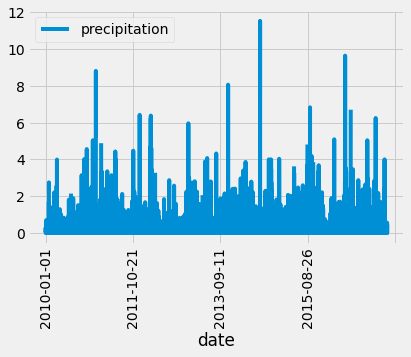

In [49]:
mydf.set_index(mydf['date'], inplace=True)
mydf = mydf.sort_index()
mydf[['date', 'precipitation']].plot(rot=90)
plt.show()

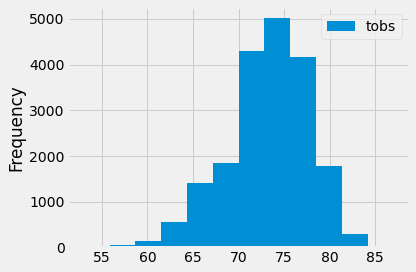

In [50]:
mydf[['tobs']].plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [51]:
mydf1 = pd.DataFrame(results1, columns=['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
mydf1

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Climate Analysis

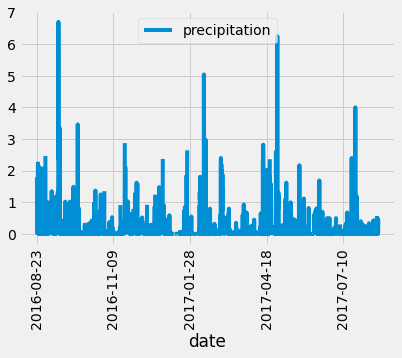

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
# print(df)
# print(df.to_string(index=False))
df = df.sort_index()
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.show()

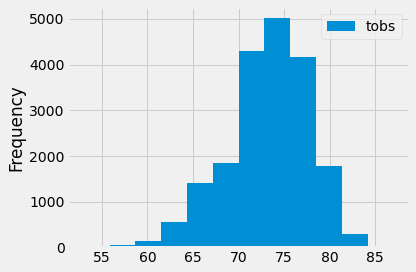

In [53]:
mydf[['tobs']].plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [55]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [56]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [58]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [60]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps():
    start_d = str(input("Key in a start date in the format of yyyy-mm-dd: "))
    end_d = str(input("Key in an end date in the format of yyyy-mm-dd: "))
    if not(start_d and end_d):
        start_d = '2017-06-01'
        end_d = '2017-06-30'
    start_d = date.fromisoformat(start_d)
    end_d = date.fromisoformat(end_d)
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    results = session.query(*sel).filter(and_(Measurement.date >= start_d, Measurement.date <= end_d)).all()
    temps = list(np.ravel(results))
    return(f'Temps= {temps}')
calc_temps()

Key in a start date in the format of yyyy-mm-dd: 2016-12-01
Key in an end date in the format of yyyy-mm-dd: 2016-12-31


'Temps= [60.0, 71.13, 78.0]'

In [61]:
df = pd.DataFrame(results, columns=['tobs'])
df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


# Challenge

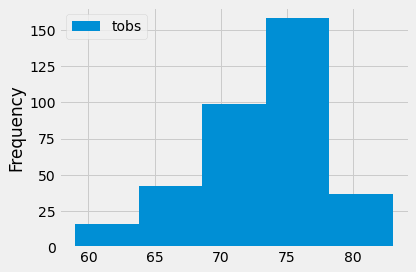

In [62]:
df.plot.hist(bins=5)
plt.tight_layout()

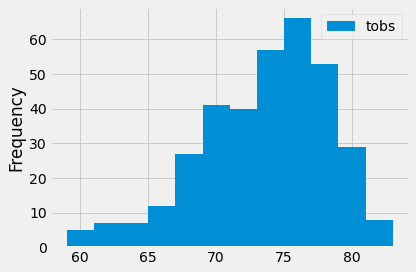

In [64]:
df.plot.hist(bins=12)
plt.tight_layout()

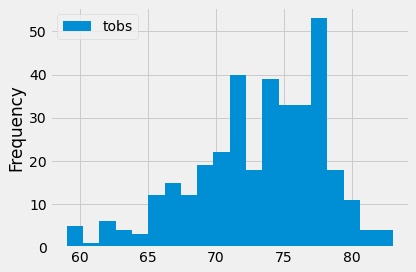

In [65]:
df.plot.hist(bins=20)
plt.tight_layout()